In [7]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping


In [8]:
import numpy as np 
import os 
import matplotlib.pyplot as plt
import tensorflow as tf 

In [9]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [10]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [13]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


Epoch 1: val_loss improved from inf to 0.05317, saving model to ./model\01-0.0532.hdf5

Epoch 2: val_loss improved from 0.05317 to 0.03926, saving model to ./model\02-0.0393.hdf5

Epoch 3: val_loss improved from 0.03926 to 0.03455, saving model to ./model\03-0.0346.hdf5

Epoch 4: val_loss improved from 0.03455 to 0.03130, saving model to ./model\04-0.0313.hdf5

Epoch 5: val_loss did not improve from 0.03130

Epoch 6: val_loss did not improve from 0.03130

Epoch 7: val_loss improved from 0.03130 to 0.02842, saving model to ./model\07-0.0284.hdf5

Epoch 8: val_loss did not improve from 0.02842

Epoch 9: val_loss did not improve from 0.02842

Epoch 10: val_loss improved from 0.02842 to 0.02841, saving model to ./model\10-0.0284.hdf5

Epoch 11: val_loss did not improve from 0.02841

Epoch 12: val_loss improved from 0.02841 to 0.02769, saving model to ./model\12-0.0277.hdf5

Epoch 13: val_loss improved from 0.02769 to 0.02477, saving model to ./model\13-0.0248.hdf5

Epoch 14: val_loss did 

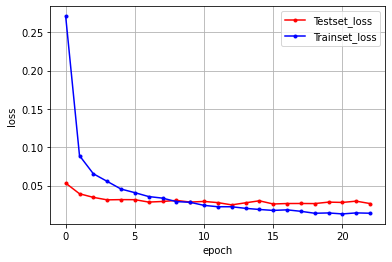

In [14]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()